# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and seaborn.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the Dataset
Load the Netflix dataset from a CSV file and display the first few rows.

This step includes loading the dataset, inspecting its structure, and understanding its contents using methods like `.info()` and `.describe()`.

In [2]:

# Load the Netflix dataset
data = pd.read_csv('netflix_titles.csv')

# Display the first few rows of the dataset
print(data.head())

# Basic information about the dataset
data.info()

# Summary statistics for numeric columns
print(data.describe(include='all'))


  show_id   type                                   title         director   
0   s7165  Movie             Kahlil Gibran's The Prophet     Roger Allers  \
1   s6911  Movie                            HALO Legends   Shinji Aramaki   
2   s7516  Movie                                Movie 43   Peter Farrelly   
3   s3486  Movie  Sturgill Simpson Presents Sound & Fury  Jumpei Mizusaki   
4   s8345  Movie  The Heyday of the Insensitive Bastards    Mark Columbus   

         director_2         director_3         director_4   
0     Ga�tan Brizzi        Paul Brizzi      Joan C. Gratz  \
1      Mamoru Oshii    Hideki Futamura    Toshiyuki Kanno   
2       Will Graham         Steve Carr      Griffin Dunne   
3     Koji Morimoto      Michael Arias   Masaru Matsumoto   
4   Lauren Hoekstra   Sarah Kruchowski         Ryan Moody   

              director_5       director_6              director_7  ...   
0   Mohammed Saeed Harib       Tomm Moore              Nina Paley  ...  \
1           Tomoki Kyo

C:\Users\leonj\AppData\Local\Temp\ipykernel_20468\4211845711.py:2: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('netflix_titles.csv')


# Data Overview
Examine the structure of the dataset, including the number of rows, columns, and their data types. Assess missing values to identify potential challenges.

In [3]:
# Display basic information about the dataset
data.info()

# Checking for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Display missing value percentages for each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data.sort_values(by='Percentage', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 75 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8808 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6172 non-null   object 
 4   director_2    614 non-null    object 
 5   director_3    72 non-null     object 
 6   director_4    35 non-null     object 
 7   director_5    20 non-null     object 
 8   director_6    13 non-null     object 
 9   director_7    13 non-null     object 
 10  director_8    11 non-null     object 
 11  director_9    10 non-null     object 
 12  director_10   8 non-null      object 
 13  director_11   5 non-null      object 
 14  director_12   3 non-null      object 
 15  director_13   1 non-null      object 
 16  cast          7982 non-null   object 
 17  cast_2        7101 non-null   object 
 18  cast_3        6900 non-null 

,Missing Values,Percentage
director_13,8807,99.988647
cast_50,8806,99.977293
cast_49,8806,99.977293
cast_48,8806,99.977293
director_12,8805,99.965940
...,...,...
listed_in,2,0.022707
description,2,0.022707
release_year,2,0.022707
title,1,0.011353


# Check for Missing Values
Check for missing values in the dataset and display the percentage of missing values for each column.

In [4]:
# Check for Missing Values

# Calculate the number of missing values and their percentage for each column
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame to display missing value counts and percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Filter out columns with no missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort the DataFrame by percentage of missing values in descending order
missing_data = missing_data.sort_values(by='Percentage', ascending=False)

# Display the missing data
missing_data

,Missing Values,Percentage
director_13,8807,99.988647
cast_50,8806,99.977293
cast_49,8806,99.977293
cast_48,8806,99.977293
director_12,8805,99.965940
...,...,...
listed_in,2,0.022707
description,2,0.022707
release_year,2,0.022707
title,1,0.011353


# Rating Distribution
Explore the distribution of content ratings (e.g., PG-13, TV-MA) to understand how content is classified. Plot the distribution of content ratings.

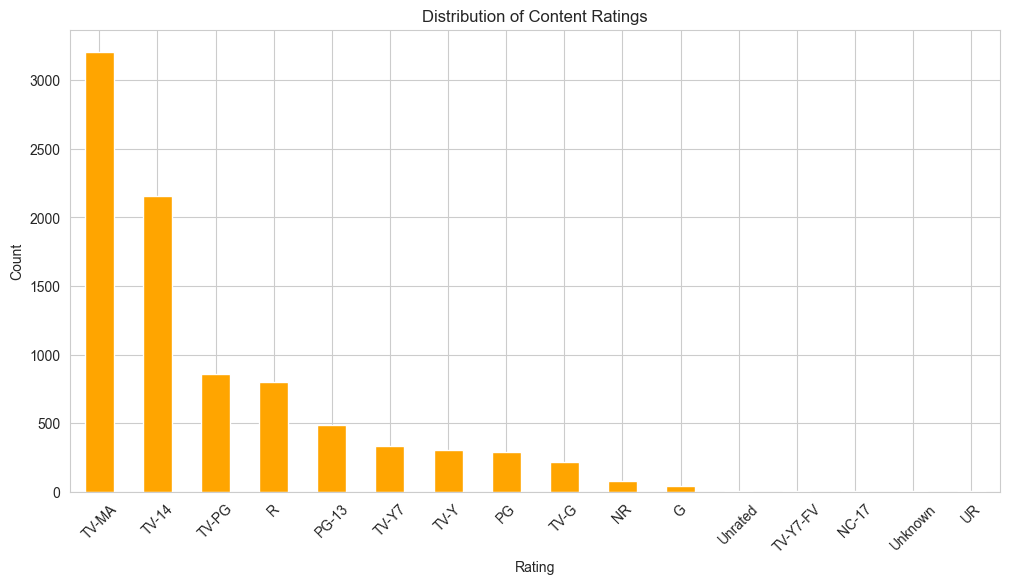

In [5]:
# Handle missing values in the 'rating' column
data['rating'] = data['rating'].fillna('Unrated')

# Replace any entries that mistakenly contain "min" with "Unknown"
data.loc[data['rating'].str.contains('min', na=False), 'rating'] = 'Unknown'

# Calculate the distribution of content ratings
rating_distribution = data['rating'].value_counts()

# Plot the distribution of content ratings
rating_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Duration Analysis
For movies, analyze the distribution of durations (in minutes), and for TV shows, explore the number of seasons. Plot the duration distribution for movies.

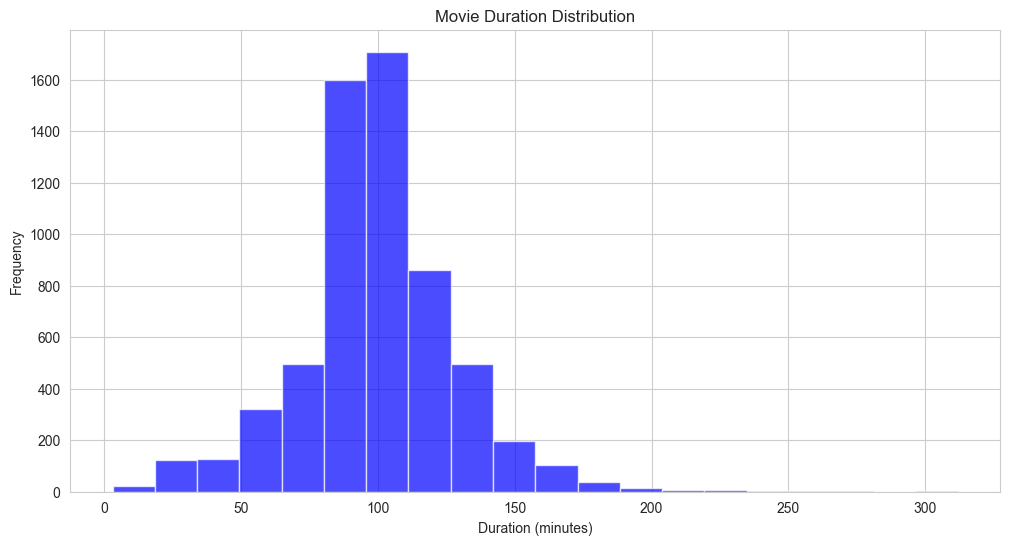

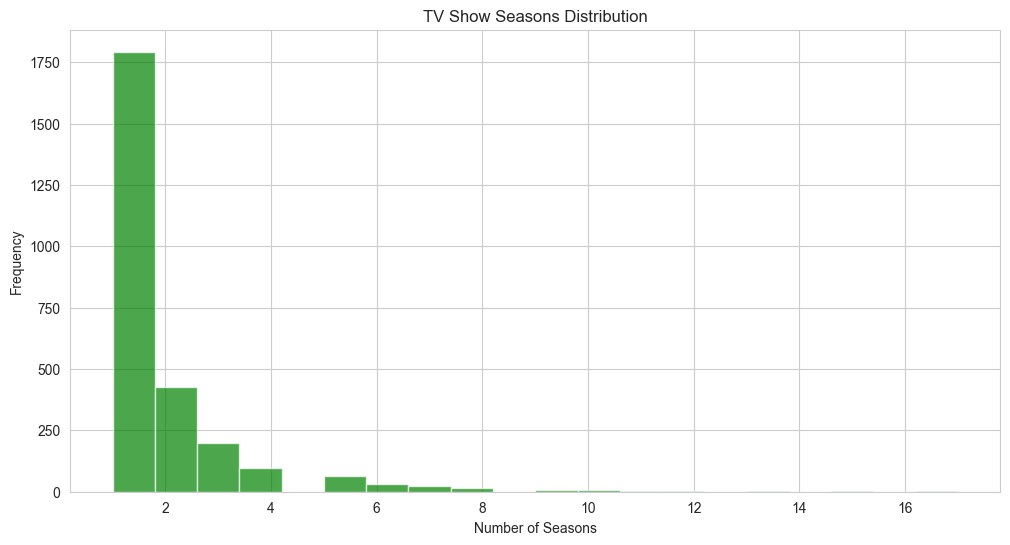

In [6]:
# Splitting duration into Movies and TV Shows
movies = data[data['type'] == 'Movie'].copy()
tv_shows = data[data['type'] == 'TV Show'].copy()

# Plotting duration distribution for Movies
movies['duration'] = movies['duration'].str.replace(' min', '')
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')
movies['duration'].dropna().plot(kind='hist', bins=20, color='blue', alpha=0.7)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting number of seasons distribution for TV Shows
tv_shows['duration'] = tv_shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '')
tv_shows['duration'] = pd.to_numeric(tv_shows['duration'], errors='coerce')
tv_shows['duration'].dropna().plot(kind='hist', bins=20, color='green', alpha=0.7)
plt.title('TV Show Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Content Type Distribution

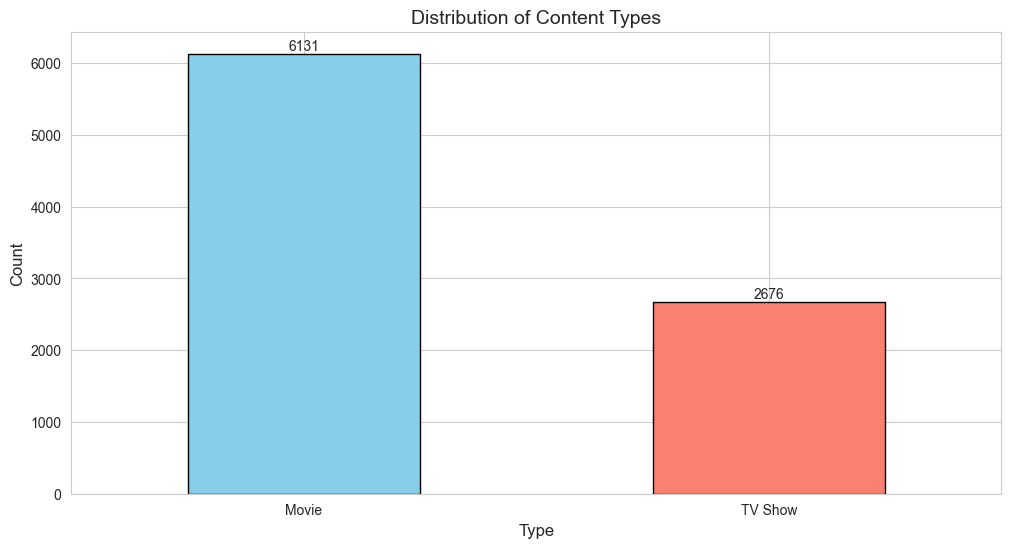

In [7]:
content_type_distribution = data['type'].value_counts()

# Plot bar chart
ax = content_type_distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribution of Content Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Annotate bar chart with percentages
for i, val in enumerate(content_type_distribution):
    plt.text(i, val + 50, f'{val}', ha='center', fontsize=10)
plt.show()


## Genre Analysis

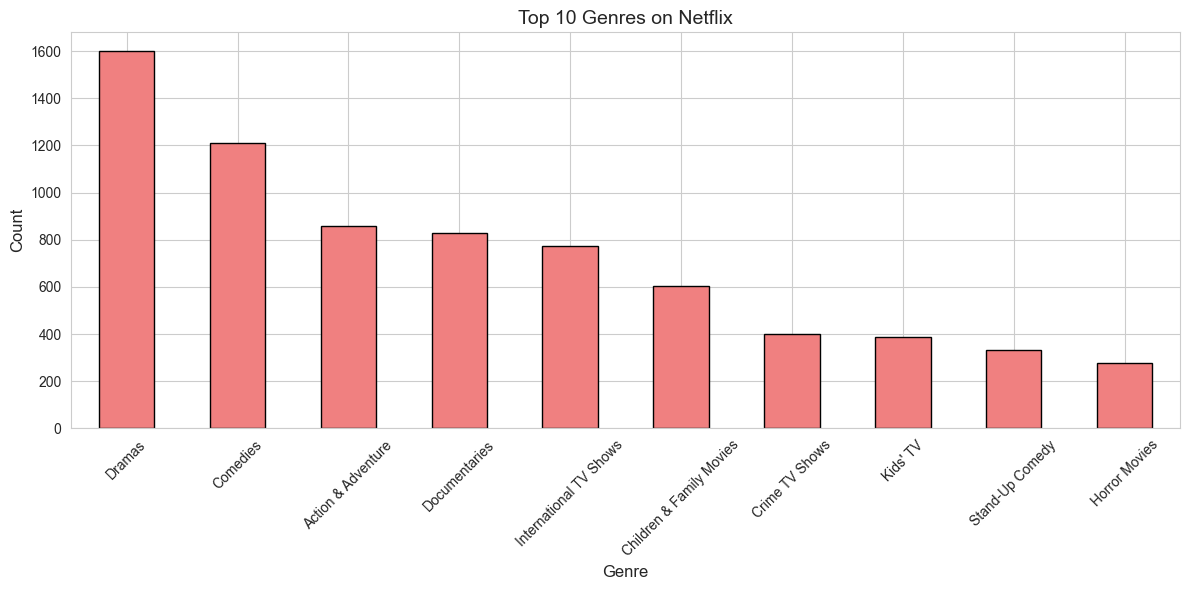

In [8]:
# Split genres into individual entries for better analysis
genres = data['listed_in'].str.split(', ').explode().value_counts()

# Plot top genres
genres.head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Genres on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Country-Based Contributions

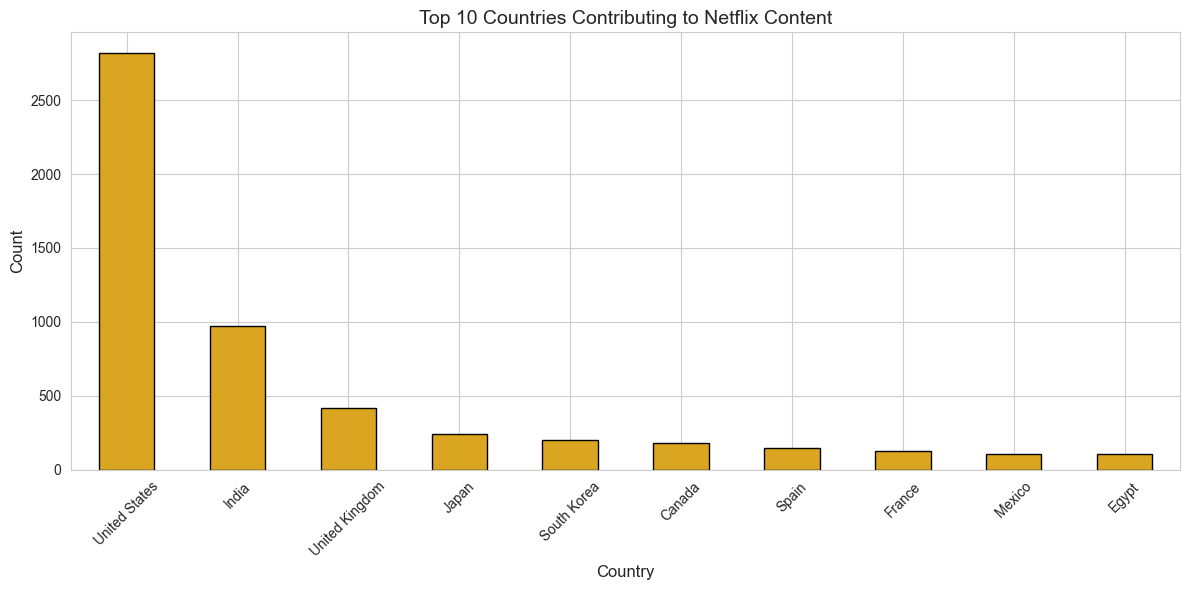

In [9]:
# Country-Wise Contributions
country_counts = data['country'].value_counts().head(10)

# Plot top countries
country_counts.plot(kind='bar', color='goldenrod', edgecolor='black')
plt.title('Top 10 Countries Contributing to Netflix Content', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Temporal Trends in Content Addition

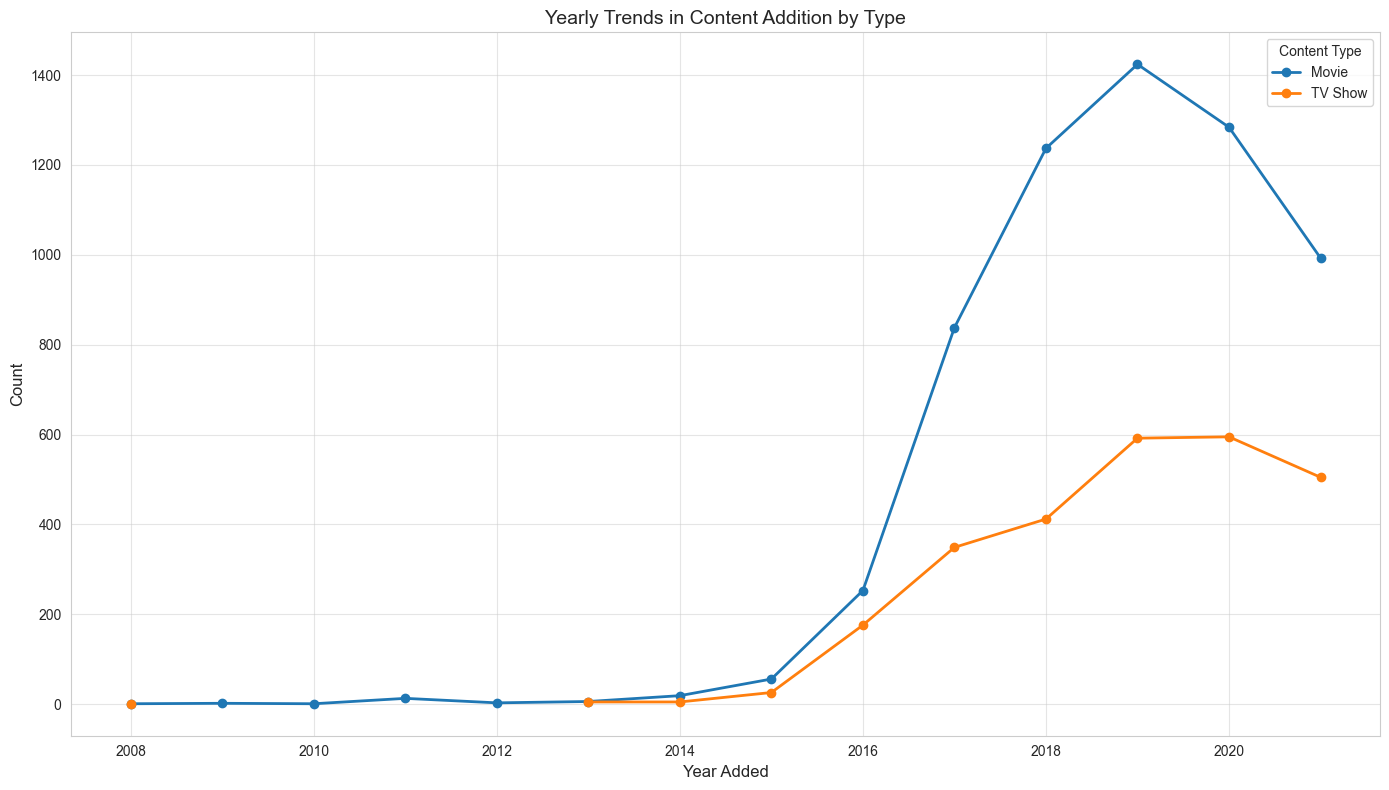

In [10]:

# Temporal Trends of Content Addition
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year

# Group by year and type
yearly_trends = data.groupby(['year_added', 'type']).size().unstack()

# Plot yearly trends
yearly_trends.plot(kind='line', marker='o', linewidth=2, figsize=(14, 8))
plt.title('Yearly Trends in Content Addition by Type', fontsize=14)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Content Type', fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



### Final Insights: Netflix Data Analysis
1. **Content Trends**: Drama and International movies are the most popular categories, indicating a preference for diverse and engaging storytelling.
2. **Production Growth**: There is a significant increase in content production after 2015, showing Netflix's aggressive expansion strategy.
3. **Regional Focus**: High growth in international content reflects Netflix's efforts to appeal to a global audience.
4. **Recommendations**:
    - Continue to invest in regional and diverse content to attract a wider audience.
    - Leverage data analytics to understand audience preferences and tailor new productions accordingly.
    - Focus on partnerships with international creators to strengthen global reach.
